In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import os
import json

style.use('ggplot')

In [186]:
dirname = os.getcwd()
dirname = dirname + '/Data/'

In [187]:
overlap = pd.read_csv(dirname + 'overlap2.csv')
grid = pd.read_csv(dirname + 'grid.csv')

In [188]:
def create_constructs(df_ARWU, year):
    
    df_ARWU['Reputation_ARWU'] = (df_ARWU['Alumni'] + df_ARWU['Award']) / 2
    df_ARWU['Publication_ARWU'] = (df_ARWU['HiCi'] + df_ARWU['NS'] + df_ARWU['PUB']) / 3
    df_ARWU = df_ARWU[['GRID_ID', "WorldRank", 'Country', 'Reputation_ARWU', 'Publication_ARWU']]
    df_ARWU['year'] = int(year)
    df_ARWU = df_ARWU[['GRID_ID', "WorldRank", 'year', 'Country', 'Reputation_ARWU', 'Publication_ARWU']]
    df_ARWU.columns = ['GRID_ID', "WorldRank", 'year', 'Country', 'Reputation_ARWU', 'Publication_ARWU']
    
    return df_ARWU

In [189]:
df_ARWU2018 = pd.read_csv(dirname + 'ARWU/ARWURanking_2018_grid.csv')
df_ARWU2017 = pd.read_csv(dirname + 'ARWU/ARWURanking_2017_grid.csv')
df_ARWU2016 = pd.read_csv(dirname + 'ARWU/ARWURanking_2016_grid.csv')
df_ARWU2015 = pd.read_csv(dirname + 'ARWU/ARWURanking_2015_grid.csv')
df_ARWU2014 = pd.read_csv(dirname + 'ARWU/ARWURanking_2014_grid.csv')
df_ARWU2013 = pd.read_csv(dirname + 'ARWU/ARWURanking_2013_grid.csv')
df_ARWU2012 = pd.read_csv(dirname + 'ARWU/ARWURanking_2012_grid.csv')

ARWU_DATA = ["GRID_ID", 'WorldRank', "Alumni","Award","HiCi", "NS", "PUB"]

df_ARWU2012 = df_ARWU2012[ARWU_DATA].dropna()
df_ARWU2013 = df_ARWU2013[ARWU_DATA].dropna()
df_ARWU2014 = df_ARWU2014[ARWU_DATA].dropna()
df_ARWU2015 = df_ARWU2015[ARWU_DATA].dropna()
df_ARWU2016 = df_ARWU2016[ARWU_DATA].dropna()
df_ARWU2017 = df_ARWU2017[ARWU_DATA].dropna()
df_ARWU2018 = df_ARWU2018[ARWU_DATA].dropna()

df_ARWU2012['WorldRank'] = df_ARWU2012['WorldRank'].astype(str).str[:3].astype(int)
df_ARWU2013['WorldRank'] = df_ARWU2013['WorldRank'].astype(str).str[:3].astype(int)
df_ARWU2014['WorldRank'] = df_ARWU2014['WorldRank'].astype(str).str[:3].astype(int)
df_ARWU2015['WorldRank'] = df_ARWU2015['WorldRank'].astype(str).str[:3].astype(int)
df_ARWU2016['WorldRank'] = df_ARWU2016['WorldRank'].astype(str).str[:3].astype(int)
df_ARWU2017['WorldRank'] = df_ARWU2017['WorldRank'].astype(str).str[:3].astype(int)
df_ARWU2018['WorldRank'] = df_ARWU2018['WorldRank'].astype(str).str[:3].astype(int)

df_ARWU2012 = pd.merge(df_ARWU2012, overlap, on='GRID_ID', how='inner')
df_ARWU2013 = pd.merge(df_ARWU2013, overlap, on='GRID_ID', how='inner')
df_ARWU2014 = pd.merge(df_ARWU2014, overlap, on='GRID_ID', how='inner')
df_ARWU2015 = pd.merge(df_ARWU2015, overlap, on='GRID_ID', how='inner')
df_ARWU2016 = pd.merge(df_ARWU2016, overlap, on='GRID_ID', how='inner')
df_ARWU2017 = pd.merge(df_ARWU2017, overlap, on='GRID_ID', how='inner')
df_ARWU2018 = pd.merge(df_ARWU2018, overlap, on='GRID_ID', how='inner')

df_ARWU2012 = pd.merge(df_ARWU2012, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_ARWU2013 = pd.merge(df_ARWU2013, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_ARWU2014 = pd.merge(df_ARWU2014, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_ARWU2015 = pd.merge(df_ARWU2015, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_ARWU2016 = pd.merge(df_ARWU2016, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_ARWU2017 = pd.merge(df_ARWU2017, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_ARWU2018 = pd.merge(df_ARWU2018, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')

df_ARWU2018 = create_constructs(df_ARWU2018, '2018')
df_ARWU2017 = create_constructs(df_ARWU2017, '2017')
df_ARWU2016 = create_constructs(df_ARWU2016, '2016')
df_ARWU2015 = create_constructs(df_ARWU2015, '2015')
df_ARWU2014 = create_constructs(df_ARWU2014, '2014')
df_ARWU2013 = create_constructs(df_ARWU2013, '2013')
df_ARWU2012 = create_constructs(df_ARWU2012, '2012')

df_ARWU2018 = df_ARWU2018.groupby('Country', as_index=False).head()
df_ARWU2017 = df_ARWU2017.groupby('Country', as_index=False).head()
df_ARWU2016 = df_ARWU2016.groupby('Country', as_index=False).head()
df_ARWU2015 = df_ARWU2015.groupby('Country', as_index=False).head()
df_ARWU2014 = df_ARWU2014.groupby('Country', as_index=False).head()
df_ARWU2013 = df_ARWU2013.groupby('Country', as_index=False).head()
df_ARWU2012 = df_ARWU2012.groupby('Country', as_index=False).head()

df_ARWU2018 = df_ARWU2018.groupby('Country', as_index=False).mean()
df_ARWU2017 = df_ARWU2017.groupby('Country', as_index=False).mean()
df_ARWU2016 = df_ARWU2016.groupby('Country', as_index=False).mean()
df_ARWU2015 = df_ARWU2015.groupby('Country', as_index=False).mean()
df_ARWU2014 = df_ARWU2014.groupby('Country', as_index=False).mean()
df_ARWU2013 = df_ARWU2013.groupby('Country', as_index=False).mean()
df_ARWU2012 = df_ARWU2012.groupby('Country', as_index=False).mean()

df_ARWU = df_ARWU2018
listARWU = [df_ARWU2017, df_ARWU2016, df_ARWU2015, df_ARWU2014, df_ARWU2013, df_ARWU2012]
for i in listARWU:
    df_ARWU = df_ARWU.append(i)

/Users/Friso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [190]:
def create_constructs_THE(df_THE, year):
    
    df_THE['Reputation_THE'] = (df_THE['Teaching'] + df_THE['Rechearch']) / 2
    df_THE['Publication_THE'] = df_THE['Citations']
    df_THE = df_THE[['GRID_ID', 'rank', 'Country', 'Reputation_THE', 'Publication_THE']]
    df_THE['year'] = int(year)
    df_THE = df_THE[['GRID_ID', 'rank', 'year', 'Country', 'Reputation_THE', 'Publication_THE']]
    df_THE.columns = ['GRID_ID', 'rank', 'year', 'Country', 'Reputation_THE', 'Publication_THE']
    
    return df_THE

In [191]:
df_THE2012 = pd.read_csv(dirname + 'THE/THERanking2013__grid.csv')
df_THE2013 = pd.read_csv(dirname + 'THE/THERanking2014__grid.csv')
df_THE2014 = pd.read_csv(dirname + 'THE/THERanking2015__grid.csv')
df_THE2015 = pd.read_csv(dirname + 'THE/THERanking2016__grid.csv')
df_THE2016 = pd.read_csv(dirname + 'THE/THERanking2017__grid.csv')
df_THE2017 = pd.read_csv(dirname + 'THE/THERanking2018__grid.csv')
df_THE2018 = pd.read_csv(dirname + 'THE/THERanking2019__grid.csv')

THE_DATA = ["GRID_ID", 'rank', 'Location', "Teaching","Rechearch","Citations", "Industry_Income", "Internationals_Outlook"]

df_THE2012['rank'] = df_THE2012['rank'].str.replace('=', '').str.replace('>', '').str[:3].astype(int)
df_THE2013['rank'] = df_THE2013['rank'].str.replace('=', '').str.replace('>', '').str[:3].astype(int)
df_THE2014['rank'] = df_THE2014['rank'].str.replace('=', '').str.replace('>', '').str[:3].astype(int)
df_THE2015['rank'] = df_THE2015['rank'].str.replace('=', '').str.replace('>', '').str[:3].astype(int)
df_THE2016['rank'] = df_THE2016['rank'].str.replace('=', '').str.replace('>', '').str[:3].astype(int)
df_THE2017['rank'] = df_THE2017['rank'].str.replace('=', '').str.replace('>', '').str[:3].astype(int)
df_THE2018['rank'] = df_THE2018['rank'].str.replace('=', '').str.replace('>', '').str[:3].astype(int)

df_THE2012 = df_THE2012[THE_DATA].dropna()
df_THE2013 = df_THE2013[THE_DATA].dropna()
df_THE2014 = df_THE2014[THE_DATA].dropna()
df_THE2015 = df_THE2015[THE_DATA].dropna()
df_THE2016 = df_THE2016[THE_DATA].dropna()
df_THE2017 = df_THE2017[THE_DATA].dropna()
df_THE2018 = df_THE2018[THE_DATA].dropna()

df_THE2012 = pd.merge(df_THE2012, overlap, on='GRID_ID', how='inner')
df_THE2013 = pd.merge(df_THE2013, overlap, on='GRID_ID', how='inner')
df_THE2014 = pd.merge(df_THE2014, overlap, on='GRID_ID', how='inner')
df_THE2015 = pd.merge(df_THE2015, overlap, on='GRID_ID', how='inner')
df_THE2016 = pd.merge(df_THE2016, overlap, on='GRID_ID', how='inner')
df_THE2017 = pd.merge(df_THE2017, overlap, on='GRID_ID', how='inner')
df_THE2018 = pd.merge(df_THE2018, overlap, on='GRID_ID', how='inner')

df_THE2012 = pd.merge(df_THE2012, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_THE2013 = pd.merge(df_THE2013, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_THE2014 = pd.merge(df_THE2014, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_THE2015 = pd.merge(df_THE2015, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_THE2016 = pd.merge(df_THE2016, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_THE2017 = pd.merge(df_THE2017, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_THE2018 = pd.merge(df_THE2018, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')

df_THE2018 = create_constructs_THE(df_THE2018, '2018')
df_THE2017 = create_constructs_THE(df_THE2017, '2017')
df_THE2016 = create_constructs_THE(df_THE2016, '2016')
df_THE2015 = create_constructs_THE(df_THE2015, '2015')
df_THE2014 = create_constructs_THE(df_THE2014, '2014')
df_THE2013 = create_constructs_THE(df_THE2013, '2013')
df_THE2012 = create_constructs_THE(df_THE2012, '2012')

df_THE2018 = df_THE2018.groupby('Country', as_index=False).head()
df_THE2017 = df_THE2017.groupby('Country', as_index=False).head()
df_THE2016 = df_THE2016.groupby('Country', as_index=False).head()
df_THE2015 = df_THE2015.groupby('Country', as_index=False).head()
df_THE2014 = df_THE2014.groupby('Country', as_index=False).head()
df_THE2013 = df_THE2013.groupby('Country', as_index=False).head()
df_THE2012 = df_THE2012.groupby('Country', as_index=False).head()

df_THE2018 = df_THE2018.groupby('Country', as_index=False).mean()
df_THE2017 = df_THE2017.groupby('Country', as_index=False).mean()
df_THE2016 = df_THE2016.groupby('Country', as_index=False).mean()
df_THE2015 = df_THE2015.groupby('Country', as_index=False).mean()
df_THE2014 = df_THE2014.groupby('Country', as_index=False).mean()
df_THE2013 = df_THE2013.groupby('Country', as_index=False).mean()
df_THE2012 = df_THE2012.groupby('Country', as_index=False).mean()

df_THE = df_THE2018
listTHE = [df_THE2017, df_THE2016, df_THE2015, df_THE2014, df_THE2013, df_THE2012]
for i in listTHE:
    df_THE = df_THE.append(i)

/Users/Friso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [192]:
def create_constructs_QS(df_QS, year):    
    df_QS['Reputation_QS'] = (df_QS['Academic_reputation'] + df_QS['Employer_reputation']) / 2
    df_QS['Publication_QS'] = df_QS['Citations']
    df_QS = df_QS[['GRID_ID', 'Rank', 'Country', 'Reputation_QS', 'Publication_QS']]
    df_QS['year'] = int(year)
    df_QS = df_QS[['GRID_ID', 'Rank', 'year', 'Country', 'Reputation_QS', 'Publication_QS']]
    df_QS.columns = ['GRID_ID', 'Rank', 'year', 'Country', 'Reputation_QS', 'Publication_QS']

    return df_QS

In [193]:
df_QS2012 = pd.read_csv(dirname + 'QS/qs2013_grid.csv')
df_QS2013 = pd.read_csv(dirname + 'QS/qs2014_grid.csv')
df_QS2014 = pd.read_csv(dirname + 'QS/qs2015_grid.csv')
df_QS2015 = pd.read_csv(dirname + 'QS/qs2016_grid.csv')
df_QS2016 = pd.read_csv(dirname + 'QS/qs2017_grid.csv')
df_QS2017 = pd.read_csv(dirname + 'QS/qs2018_grid.csv')
df_QS2018 = pd.read_csv(dirname + 'QS/qs2019_grid.csv')

QS_DATA = ["GRID_ID", 'Rank', 'location', "Academic_reputation","Employer_reputation","Faculty_Student", "International_Faculty", 
           "International_Students", "Citations"]

df_QS2018 = df_QS2018.replace(0, np.nan)
df_QS2017 = df_QS2017.replace(0, np.nan)
df_QS2016 = df_QS2016.replace(0, np.nan)
df_QS2015 = df_QS2015.replace(0, np.nan)
df_QS2014 = df_QS2014.replace(0, np.nan)
df_QS2013 = df_QS2013.replace(0, np.nan)
df_QS2012 = df_QS2012.replace(0, np.nan)

df_QS2018 = df_QS2018[QS_DATA].dropna()
df_QS2017 = df_QS2017[QS_DATA].dropna()
df_QS2016 = df_QS2016[QS_DATA].dropna()
df_QS2015 = df_QS2015[QS_DATA].dropna()
df_QS2014 = df_QS2014[QS_DATA].dropna()
df_QS2013 = df_QS2013[QS_DATA].dropna()
df_QS2012 = df_QS2012[QS_DATA].dropna()

df_QS2018['Rank'] = df_QS2018['Rank'].str.replace('=', '').str[:3].astype(int)
df_QS2017['Rank'] = df_QS2017['Rank'].str.replace('=', '').str[:3].astype(int)
df_QS2016['Rank'] = df_QS2016['Rank'].str.replace('=', '').str[:3].astype(int)
df_QS2015['Rank'] = df_QS2015['Rank'].str.replace('=', '').str[:3].astype(int)
df_QS2014['Rank'] = df_QS2014['Rank'].str.replace('=', '').str[:3].astype(int)
df_QS2013['Rank'] = df_QS2013['Rank'].str.replace('=', '').str[:3].astype(int)
df_QS2012['Rank'] = df_QS2012['Rank'].str.replace('=', '').str[:3].astype(int)

df_QS2018 = pd.merge(df_QS2018, overlap, on='GRID_ID', how='inner')
df_QS2017 = pd.merge(df_QS2017, overlap, on='GRID_ID', how='inner')
df_QS2016 = pd.merge(df_QS2016, overlap, on='GRID_ID', how='inner')
df_QS2015 = pd.merge(df_QS2015, overlap, on='GRID_ID', how='inner')
df_QS2014 = pd.merge(df_QS2014, overlap, on='GRID_ID', how='inner')
df_QS2013 = pd.merge(df_QS2013, overlap, on='GRID_ID', how='inner')
df_QS2012 = pd.merge(df_QS2012, overlap, on='GRID_ID', how='inner')

df_QS2018 = pd.merge(df_QS2018, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_QS2017 = pd.merge(df_QS2017, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_QS2016 = pd.merge(df_QS2016, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_QS2015 = pd.merge(df_QS2015, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_QS2014 = pd.merge(df_QS2014, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_QS2013 = pd.merge(df_QS2013, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_QS2012 = pd.merge(df_QS2012, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')

df_QS2018 = create_constructs_QS(df_QS2018, '2018')
df_QS2017 = create_constructs_QS(df_QS2017, '2017')
df_QS2016 = create_constructs_QS(df_QS2016, '2016')
df_QS2015 = create_constructs_QS(df_QS2015, '2015')
df_QS2014 = create_constructs_QS(df_QS2014, '2014')
df_QS2013 = create_constructs_QS(df_QS2013, '2013')
df_QS2012 = create_constructs_QS(df_QS2012, '2012')

df_QS2018 = df_QS2018.groupby('Country', as_index=False).head()
df_QS2017 = df_QS2017.groupby('Country', as_index=False).head()
df_QS2016 = df_QS2016.groupby('Country', as_index=False).head()
df_QS2015 = df_QS2015.groupby('Country', as_index=False).head()
df_QS2014 = df_QS2014.groupby('Country', as_index=False).head()
df_QS2013 = df_QS2013.groupby('Country', as_index=False).head()
df_QS2012 = df_QS2012.groupby('Country', as_index=False).head()

df_QS2018 = df_QS2018.groupby('Country', as_index=False).mean()
df_QS2017 = df_QS2017.groupby('Country', as_index=False).mean()
df_QS2016 = df_QS2016.groupby('Country', as_index=False).mean()
df_QS2015 = df_QS2015.groupby('Country', as_index=False).mean()
df_QS2014 = df_QS2014.groupby('Country', as_index=False).mean()
df_QS2013 = df_QS2013.groupby('Country', as_index=False).mean()
df_QS2012 = df_QS2012.groupby('Country', as_index=False).mean()

df_QS = df_QS2018
listQS = [df_QS2017, df_QS2016, df_QS2015, df_QS2014, df_QS2013, df_QS2012]
for i in listQS:
    df_QS = df_QS.append(i)

/Users/Friso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [194]:
def create_uni_df(ARWU, THE, QS, COUNTRY):
    ARWU = ARWU[ARWU['Country'] == COUNTRY]
    THE = THE[THE['Country'] == COUNTRY]
    QS = QS[QS['Country'] == COUNTRY]

    return ARWU, THE, QS

In [195]:
def add_arrow(line, position=None, direction='right', size=20, color=None):
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    for i in range(len(xdata) - 1):
        position = xdata[i]
        start_ind = np.argmin(np.absolute(xdata - position))
        if direction == 'right':
            end_ind = start_ind + 1
        else:
            end_ind = start_ind - 1

        line.axes.annotate('',
            xytext=(xdata[start_ind], ydata[start_ind]),
            xy=(xdata[end_ind], ydata[end_ind]),
            arrowprops=dict(arrowstyle="-|>", color=color),
            size=size
        )

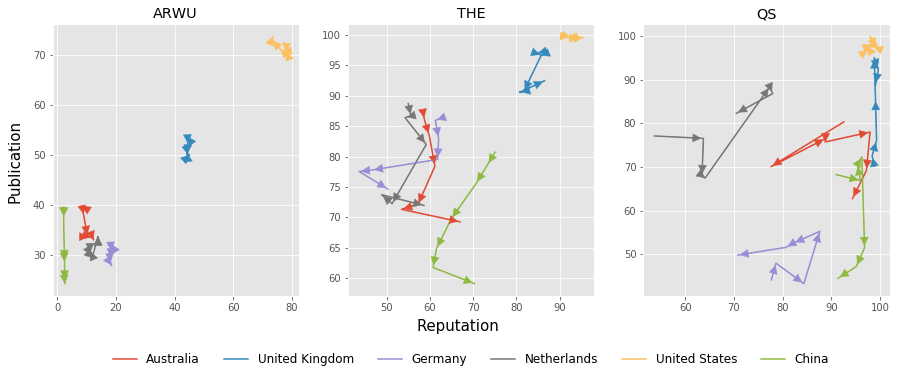

In [196]:
fig, (ax1, ax2 ,ax3) = plt.subplots(1, 3, figsize=(15,5))

country_list = ['Australia', 'United Kingdom', 'Germany', 'Netherlands', 'United States', 'China']

for i in country_list:
    ARWU_temp, THE_temp, QS_temp = create_uni_df(df_ARWU, df_THE, df_QS, i)
    
    line = ax1.plot(ARWU_temp['Reputation_ARWU'], ARWU_temp['Publication_ARWU'])[0]
    add_arrow(line)
    line = ax2.plot(THE_temp['Reputation_THE'], THE_temp['Publication_THE'])[0]
    add_arrow(line)
    line = ax3.plot(QS_temp['Reputation_QS'], QS_temp['Publication_QS'])[0]
    add_arrow(line)
    
ax1.set_title('ARWU')
ax2.set_title('THE')
ax3.set_title('QS')
fig.text(0.5, 0.04, 'Reputation', ha='center', va='center', fontsize=15)
fig.text(0.09, 0.5, 'Publication', ha='center', va='center', rotation='vertical', fontsize=15)
ax2.legend(country_list, loc='upper center',
           bbox_to_anchor=(0.5, -0.17), ncol=len(country_list), fontsize = 'large', frameon=False)